<a href="https://colab.research.google.com/github/adnanagbaria/MLcourse/blob/main/Lec7_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - part 2
Agenda:
* Entropy
* Mutual Information
* Decision Tree Classifier
* Model Evaluation

# Entropy
Entropy is a measure from information theory that quantifies the uncertainty or impurity in a set of data. It’s central in decision trees, classification, and probabilistic models.

For a discrete random variable $X$, with classes $c_1, c_2, ..., c_k$:

$H(X) = -\Sigma P(c_i) \log_2P(c_i)$

Where:
* $P(c_i)$: probability of class $c_i$
* The log base 2 gives the result in bits

**Interpretation:**
* High entropy = high uncertainty = classes are evenly distributed
* Low entropy = low uncertainty = one class dominates

**Examples:**

| Class Distribution       | Entropy |
| ------------------------ | ------- |
| \[0.5, 0.5] (50/50)      | 1.0     |
| \[1.0, 0.0] (pure class) | 0.0     |
| \[0.8, 0.2]              | 0.72    |

**In Decision Trees:**
Entropy is used to evaluate splits:
* The algorithm chooses splits that minimize entropy (maximize information gain).
* This leads to more homogeneous child nodes.

**In Maximum Entropy Models:**
Among all models satisfying the training constraints (e.g., expected feature values), the maximum entropy model is the least biased, making the fewest assumptions beyond what is learned.

In [1]:
# prompt: give an example on entropy

import numpy as np

def entropy(probabilities):
    """Calculates the entropy for a given set of probabilities."""
    # Filter out probabilities of 0 to avoid log(0)
    probabilities = np.asarray(probabilities)
    probabilities = probabilities[probabilities > 0]
    return -np.sum(probabilities * np.log2(probabilities))

# Example 1: 50/50 distribution
probs1 = [0.5, 0.5]
print(f"Entropy for {probs1}: {entropy(probs1)}")

# Example 2: Pure class
probs2 = [1.0, 0.0]
print(f"Entropy for {probs2}: {entropy(probs2)}")

# Example 3: 80/20 distribution
probs3 = [0.8, 0.2]
print(f"Entropy for {probs3}: {entropy(probs3)}")

# Example 4: Three classes
probs4 = [1/3, 1/3, 1/3]
print(f"Entropy for {probs4}: {entropy(probs4)}")

Entropy for [0.5, 0.5]: 1.0
Entropy for [1.0, 0.0]: -0.0
Entropy for [0.8, 0.2]: 0.7219280948873623
Entropy for [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]: 1.584962500721156


# Mutual Information
Mutual Information measures how much knowing one variable reduces uncertainty about another. It quantifies the information shared between two variables.

For discrete variables $X$ and $Y$:

$I(X;Y) = \Sigma_{x \in X} \Sigma_{y \in Y} P(x, y) \log_2(\frac{P(x,y)}{P(x)P(y)}) $
* $P(x,y)$: joint probability
* $P(x), P(y)$: marginal probabilities

**Interpretation:**
* $I(X;Y) = 0$: $X$ and $Y$ are independent
* Higher MI = stronger dependence

**Relation to Entropy:**

$I(X;Y) = H(X) - H(X|Y)$

Measures the reduction in uncertainty of $X$ after observing $Y$

**Use in Machine Learning:**
* Feature selection: Rank features by how much information they share with the target
* Decision trees: Sometimes used instead of information gain
* Unsupervised learning: Measure association between variables (e.g., clustering labels and true labels)


In [2]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
mi = mutual_info_classif(X, y)
print("Mutual Information scores:", mi)


Mutual Information scores: [0.49844807 0.23616305 0.98698301 0.99202902]


# Decision Tree Classifier
A Decision Tree Classifier is a supervised learning algorithm that predicts class labels by learning simple decision rules inferred from the data features. It’s a specific case of decision trees used for classification tasks (not regression).

**Key Concepts:**
* Root Node: The topmost decision node (entire dataset)
* Internal Nodes: Decision points based on feature values
* Leaf Nodes: Terminal nodes that assign class labels
* Splitting Criteria (how to choose the best feature at each node):
  * Gini Impurity (default in sklearn)
  * Entropy (Information Gain)

**Splitting Criteria:**
* Entropy / Information Gain
* Gini Impurity
* For regression: Mean Squared Error (MSE) (Lec 5)

**Gini Impurity Formula:**

$G = 1- \Sigma p_i^2$

Where $p_i$ is the proportion of samples belonging to class $i$

**Entropy Example (Binary Split):**
If a node has:
* 4 samples of Class A
* 4 samples of Class B

Then entropy: $H=−0.5log(0.5) −0.5log(0.5)=1.0$ (maximum uncertainty)

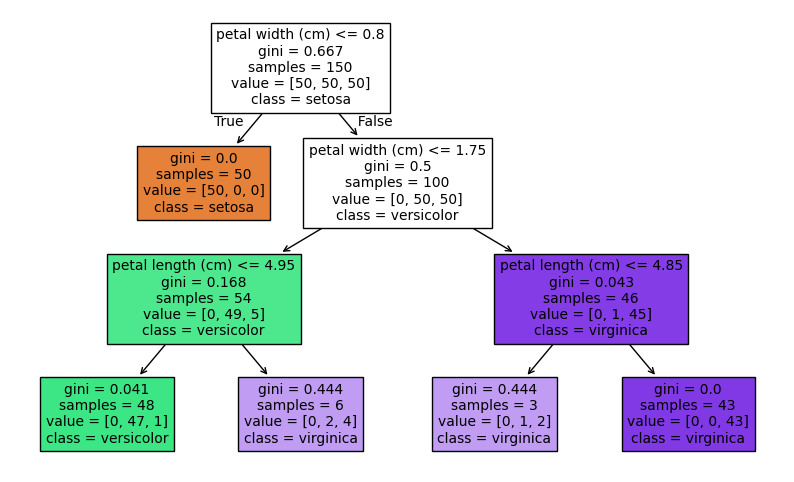

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load data
X, y = load_iris(return_X_y=True)

# Train decision tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

# Visualize
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=load_iris().feature_names, class_names=load_iris().target_names, filled=True)
plt.show()


**Pros:**
* Intuitive and easy to interpret
* Handles both numerical and categorical data
* No need for feature scaling

**Cons:**
* Can easily overfit
* Sensitive to noisy data

Predicted class for first sample: [0]


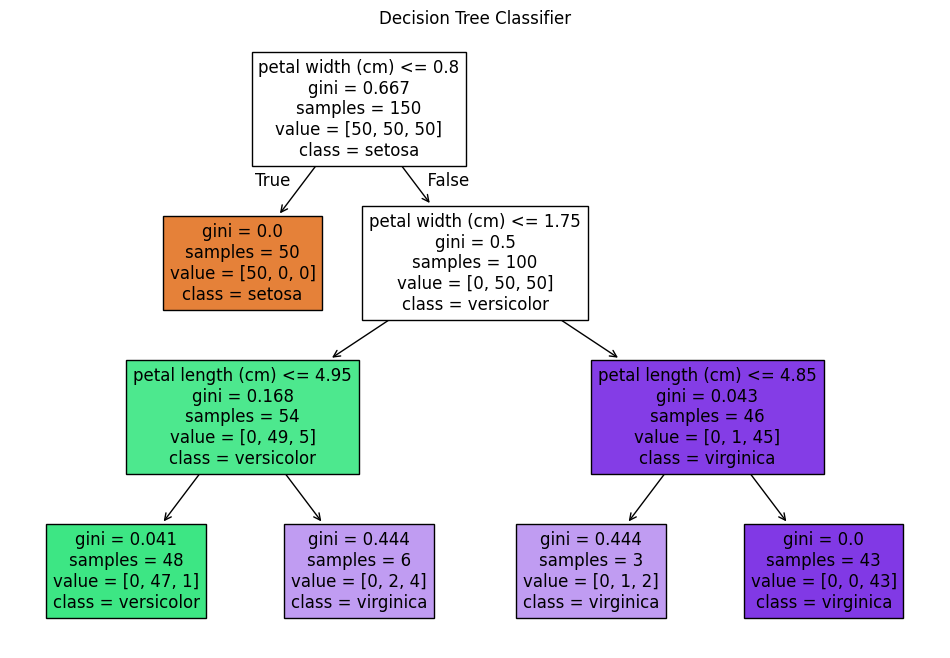

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load sample data
X, y = load_iris(return_X_y=True)

# Fit classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X, y)

# Predict
print("Predicted class for first sample:", clf.predict([X[0]]))

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=load_iris().feature_names, class_names=load_iris().target_names, filled=True)
plt.title("Decision Tree Classifier")
plt.show()


# Random Forest Classifier
A Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to make a final decision. It is used for both classification and regression and is known for its accuracy and robustness.

(Lec5: Random Forest Regression)

**How It Works (Classification):**
1. Draw multiple bootstrap samples from the training data.
2. Build a decision tree on each sample:
  * At each split, consider a random subset of features.
3. Aggregate predictions:
  * For classification: use majority voting
  * For regression: take average prediction

**Why Random Forest?**
* Reduces overfitting by averaging multiple models.
* Handles large feature spaces and missing values.
* Automatically performs feature selection.


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


**Advantages:**
* High accuracy
* Resistant to overfitting
* Handles both numeric and categorical features
* Good for datasets with missing values

**Disadvantages:**
* Less interpretable than a single decision tree
* Can be slower to predict with large forests

# Model Evaluation and Cross-Validation
Evaluating a model's performance is essential to understand how well it generalizes to unseen data. Cross-validation is a robust way to test this.

**Model Evaluation Metrics (Classification)**

| Metric               | Description                                                    |
| -------------------- | -------------------------------------------------------------- |
| **Accuracy**         | $\frac{\text{Correct Predictions}}{\text{Total}}$              |
| **Precision**        | $\frac{TP}{TP + FP}$ - focus on positive prediction quality    |
| **Recall**           | $\frac{TP}{TP + FN}$ - focus on capturing all actual positives |
| **F1 Score**         | Harmonic mean of precision and recall                          |
| **Confusion Matrix** | Shows TP, TN, FP, FN counts                                    |
| **ROC-AUC**          | Area under the ROC curve — good for class imbalance            |

**What is Cross-Validation?**
Cross-validation is a technique for assessing how a model generalizes by splitting the dataset multiple times into training and test sets.

**K-Fold Cross-Validation**
1. Split the data into K equal parts (folds).
2. Use K–1 folds for training, 1 for testing.
3. Repeat K times, changing the test fold each time.
4. Average the performance metrics.


In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load data
X, y = load_iris(return_X_y=True)
model = RandomForestClassifier()

# Evaluate with 5-fold CV
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Accuracy per fold:", scores)
print("Mean accuracy:", scores.mean())


Accuracy per fold: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Mean accuracy: 0.9600000000000002


# The Confusion Matrix
A confusion matrix is a table that summarizes the performance of a classification model by comparing the actual and predicted classes.

**Structure (Binary Classification):**

|                     | **Predicted Positive** | **Predicted Negative** |
| ------------------- | ---------------------- | ---------------------- |
| **Actual Positive** | True Positive (TP)     | False Negative (FN)    |
| **Actual Negative** | False Positive (FP)    | True Negative (TN)     |


**Key Metrics Derived:**
* Accuracy = $\frac{TP+TN}{TP+TN+FP+FN}$
* Precision = $\frac{TP}{TP+FP}$
* Recall (Sensitivity) = $\frac{TP}{TP+FN}$
* F1 Score = $2 \frac{Precision \times Recall}{Precision + Recall}$, the
harmonic mean of precision and recall

(Lec7: Slide 126 - 165)

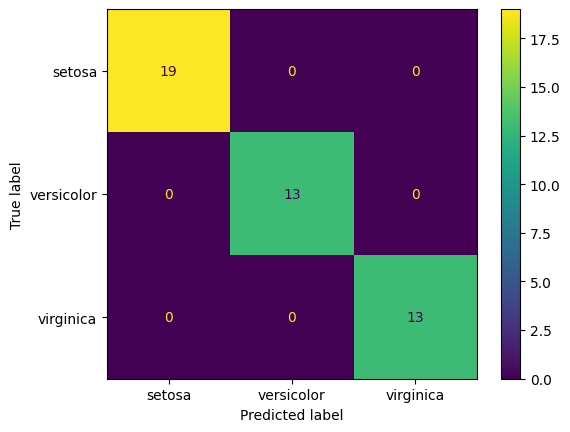

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=load_iris().target_names)
disp.plot()


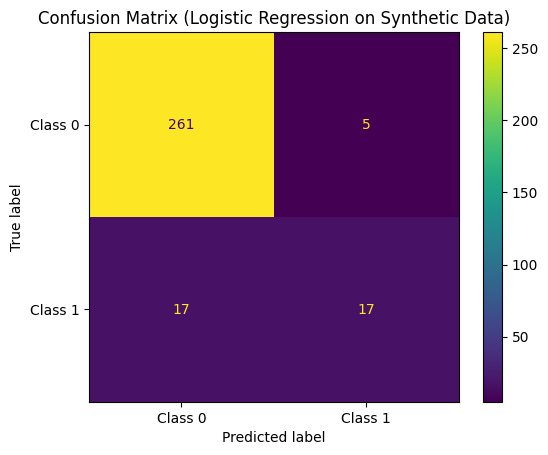


Key Metrics Derived:
              precision    recall  f1-score   support

     Class 0       0.94      0.98      0.96       266
     Class 1       0.77      0.50      0.61        34

    accuracy                           0.93       300
   macro avg       0.86      0.74      0.78       300
weighted avg       0.92      0.93      0.92       300


Manual Calculation based on Confusion Matrix:
True Positives (TP): 17
True Negatives (TN): 261
False Positives (FP): 5
False Negatives (FN): 17
Accuracy: 0.9267
Precision (for Class 1): 0.7727
Recall (for Class 1): 0.5000
F1 Score (for Class 1): 0.6071


In [11]:
# prompt: give another example of Confusion Matrix, show the vales of Key Metrics Derived

import matplotlib.pyplot as plt
# Another example using a different dataset (e.g., make_classification)
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], random_state=42, flip_y=0.05)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train classifier (using a different one for variety)
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(random_state=42)
clf_logistic.fit(X_train, y_train)
y_pred_logistic = clf_logistic.predict(X_test)

# Compute and plot confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=['Class 0', 'Class 1'])
disp_logistic.plot()
plt.title("Confusion Matrix (Logistic Regression on Synthetic Data)")
plt.show()

# Show Key Metrics Derived
print("\nKey Metrics Derived:")
print(classification_report(y_test, y_pred_logistic, target_names=['Class 0', 'Class 1']))

# Manually calculate some metrics from the confusion matrix for illustration
tn, fp, fn, tp = cm_logistic.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nManual Calculation based on Confusion Matrix:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (for Class 1): {precision:.4f}")
print(f"Recall (for Class 1): {recall:.4f}")
print(f"F1 Score (for Class 1): {f1:.4f}")